**Dataset-2:** This project will use a dataset from microchip quality assurance tests. The dataset
indicates if a microchip is accepted or not based on the outcome of two tests.

**Import Libraries:** The first step in any project is to import the libraries we are going to use.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Load the Data:** The next step is to load the data. In this lab, the dataset is saved as .txt file (previous lab the data was saved as .csv file). Here, we will implement a function that helps us to load the data.

In [ ]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

Now, let's load the data for this problem.

In [ ]:
data = loaddata('chipDataset.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


**Process the data:** Let's separate our X (features) and Y (labels) parts of the data.

In [ ]:
X = data[:, :2]
y = data[:, 2]

**Plot the data:** We will implement a function to help us with the scatter plot.

In [ ]:
def plotData(X, y):
    pos = y == 1
    neg = y == 0

    plt.figure(figsize=(10, 6))
    plt.scatter(X[pos, 0], X[pos, 1], c='k', marker='+', label='Accepted')
    plt.scatter(X[neg, 0], X[neg, 1], c='y', marker='o', label='Rejected')

    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend()
    plt.grid(True)


Let's plot the data by calling our plot function.

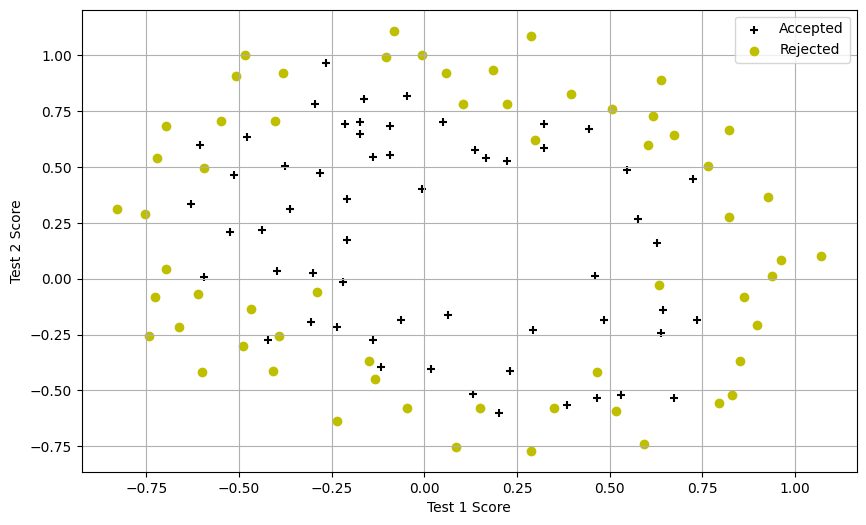

Features shape: (118, 2)
Labels shape: (118,)
First 5 features:
 [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
First 5 labels: [1. 1. 1. 1. 1.]


In [ ]:
plotData(X, y)
plt.show()

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

print("First 5 features:\n", X[:5])
print("First 5 labels:", y[:5])

**Implement a Logistic Regression Model:**

*Sigmoid Function:* Let's implement the Sigmoid function.

In [ ]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

Let's test it:

In [ ]:
sigmoid(0)

0.5

*Generate polynomial & interaction features*

Create polynomial features with degree = 6

In [ ]:
poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X)

Fit a logistic regression model to the transformed data

In [ ]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_poly, y)

y_pred = log_reg.predict(X_poly)

accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 83.05%


***Cost Function and Gradient:*** Let's first implement a function to calculate the cost  $J$. This function will return the cost value.

In [ ]:
def costFunctionReg(theta, X, y, lambda_):
    m = y.size
    f = sigmoid(X.dot(theta))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Cost function with regularization
    J = -1 * (1 / m) * (np.log(f).T.dot(y) + np.log(1 - f).T.dot(1 - y)) + reg_term

    return J

Let's implement another function to get the gradient.

In [ ]:
def gradientReg(theta, X, y, lambda_):
    m = y.size
    f = sigmoid(X.dot(theta.reshape(-1, 1)))

    y = y.reshape(-1, 1)

    reg_term = (lambda_ / m) * np.r_[[0], theta[1:]].reshape(-1, 1)

    grad = (1 / m) * X.T.dot(f - y) + reg_term

    return grad.flatten()

Let's test our cost and gradient functions.

In [ ]:
initial_theta = np.zeros(XX.shape[1])
lambda_value = 1
cost = costFunctionReg(initial_theta, XX, y, lambda_value)
grad = gradientReg(initial_theta, XX, y, lambda_value)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599454
Grad: 
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


 Find the optimal coefficients and plot the decision boundary for:  lambda =0, lambda=1, and
lambda=100.

In [ ]:
def findOptimalCoefficients(X, y, lambda_):
    initial_theta = np.zeros(X.shape[1])
    result = minimize(fun=costFunctionReg,
                      x0=initial_theta,
                      args=(X, y, lambda_),
                      method='TNC',
                      jac=gradientReg)
    return result.x

In [ ]:
def plotDecisionBoundary(theta, X, y, lambda_):
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    plotData(X[:, 1:3], y)
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U, V = np.meshgrid(u, v)
    Z = np.zeros(U.shape)
    for i in range(U.shape[0]):
        for j in range(U.shape[1]):
            Z[i, j] = np.dot(poly.transform(np.array([[U[i, j], V[i, j]]])), theta)
    plt.contour(U, V, Z, levels=[0], linewidths=2, colors='g')
    plt.title(f'Decision Boundary for lambda = {lambda_}')
    plt.show()

In [ ]:
def predict(theta, X, threshold=0.5):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= threshold).astype(int)

In [ ]:
def findOptimalCoefficients(X, y, lambda_):
    initial_theta = np.zeros(X.shape[1])
    result = minimize(fun=costFunctionReg, x0=initial_theta, args=(X, y, lambda_), method='TNC', jac=gradientReg)
    return result.x

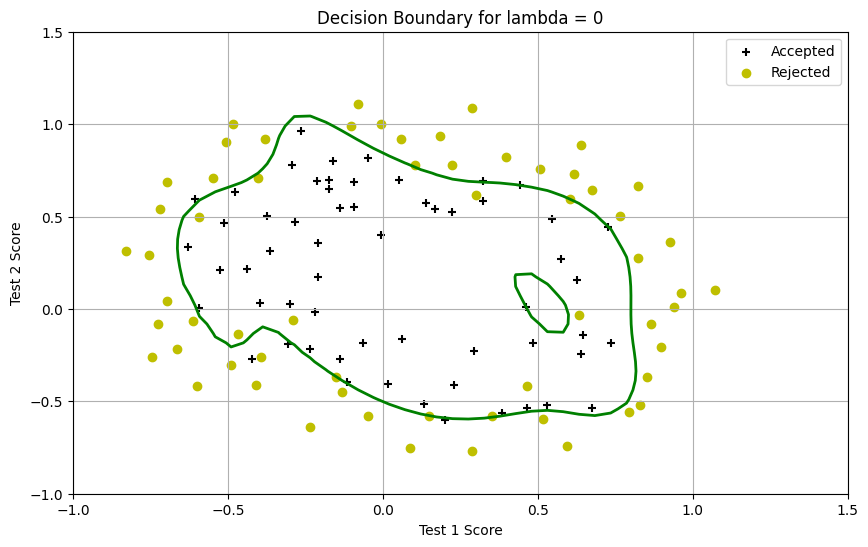

Accuracy for lambda = 0: 88.14%


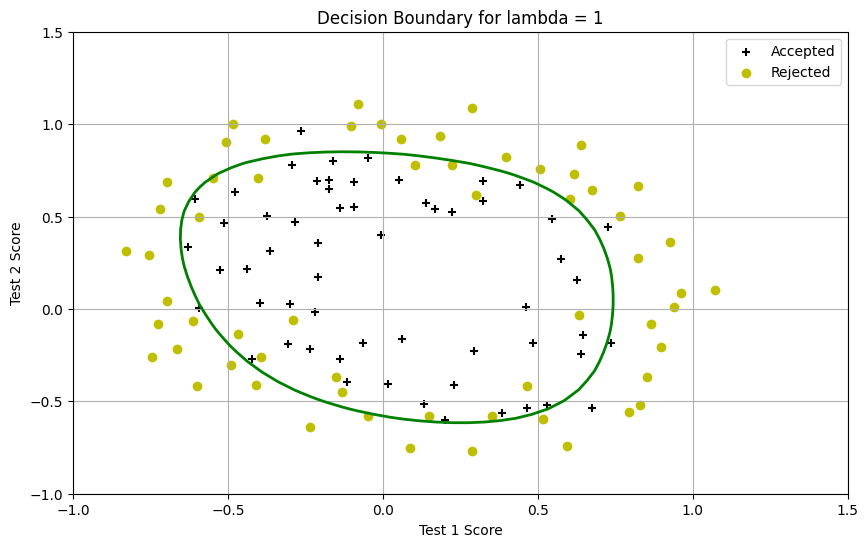

Accuracy for lambda = 1: 83.05%


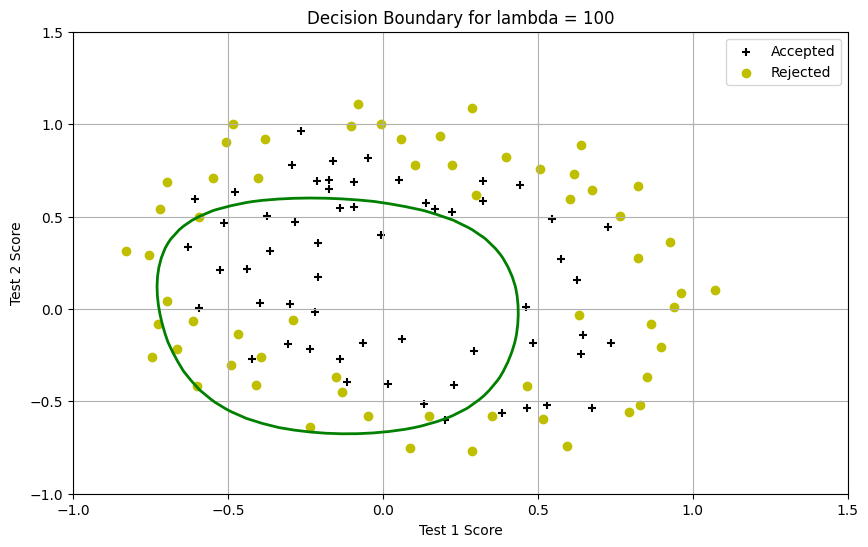

Accuracy for lambda = 100: 61.02%

Best accuracy is 88.14% with lambda = 0


In [ ]:
lambda_values = [0, 1, 100]
accuracies = []

for lambda_ in lambda_values:
    optimal_theta = findOptimalCoefficients(X_poly, y, lambda_)
    plotDecisionBoundary(optimal_theta, X_poly, y, lambda_)
    predictions = predict(optimal_theta, X_poly)
    accuracy = accuracy_score(y, predictions)
    accuracies.append(accuracy)
    print(f"Accuracy for lambda = {lambda_}: {accuracy * 100:.2f}%")

best_accuracy_index = np.argmax(accuracies)
best_accuracy = accuracies[best_accuracy_index]
best_lambda = lambda_values[best_accuracy_index]

print(f"\nBest accuracy is {best_accuracy * 100:.2f}% with lambda = {best_lambda}")


# ***Answers to questions***

**• Load the data and generate a scatter plot, separate your data into features and labels, and use the PolynomialFeatures function in sklearn with degree = 6 to generate polynomial
and interaction features.**

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


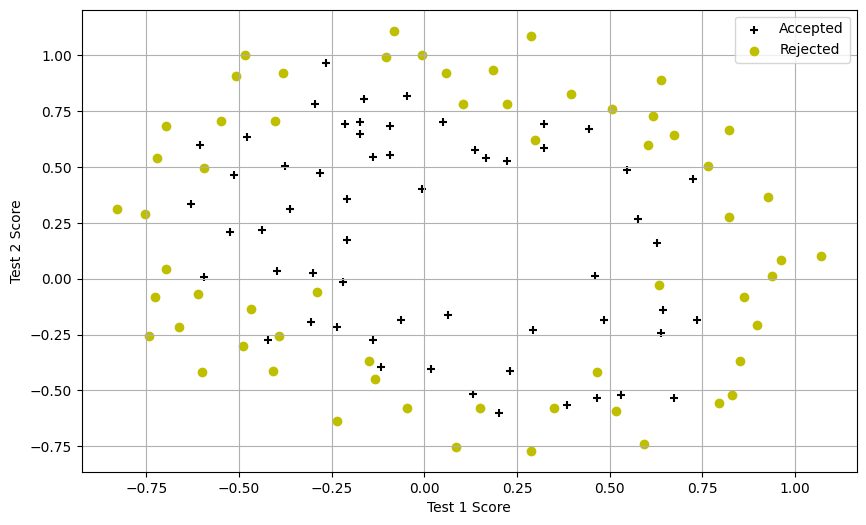

In [ ]:
data = loaddata('Lab2_Dataset_2.txt', ',')

X = data[:, :2]
y = data[:, 2]

poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)

plotData(X, y)
plt.show()

**• Can this dataset be separated into positive and negative examples by a linear decision
boundary?**

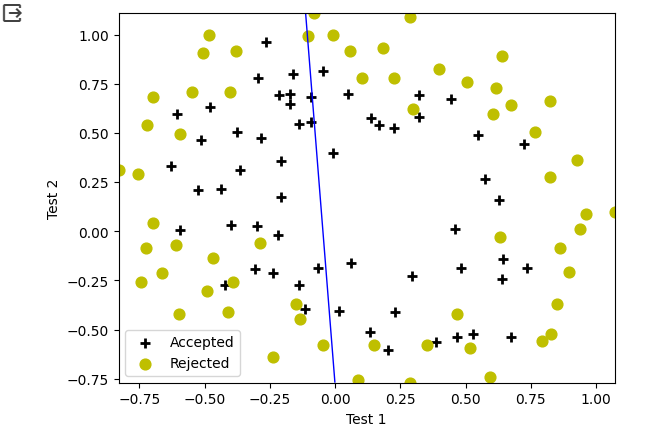

**No**, for this dataset a linear model would be innefective seperating values.

**• Update the cost and gradient functions to include a regularization term. Also, implement a function to find the model's optimal coefficients.**

In [ ]:
def costFunctionReg(theta, X, y, lambda_):
    m = y.size
    f = sigmoid(X.dot(theta))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Cost function with regularization
    J = -1 * (1 / m) * (np.log(f).T.dot(y) + np.log(1 - f).T.dot(1 - y)) + reg_term

    return J

def gradientReg(theta, X, y, lambda_):
    m = y.size
    f = sigmoid(X.dot(theta.reshape(-1, 1)))

    y = y.reshape(-1, 1)

    reg_term = (lambda_ / m) * np.r_[[0], theta[1:]].reshape(-1, 1)

    grad = (1 / m) * X.T.dot(f - y) + reg_term

    return grad.flatten()

initial_theta = np.zeros(XX.shape[1])
lambda_value = 1
cost = costFunctionReg(initial_theta, XX, y, lambda_value)
grad = gradientReg(initial_theta, XX, y, lambda_value)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599454
Grad: 
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


**•Finally, Find the optimal coefficients and plot the decision boundary for: (a)lambda=0, (b) lambda=1, and (c) lambda=100.**

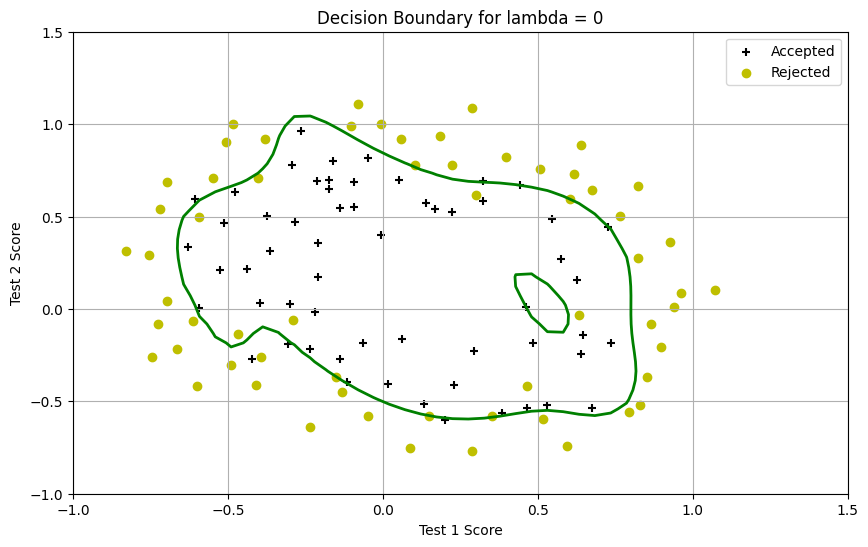

Accuracy for lambda = 0: 88.14%


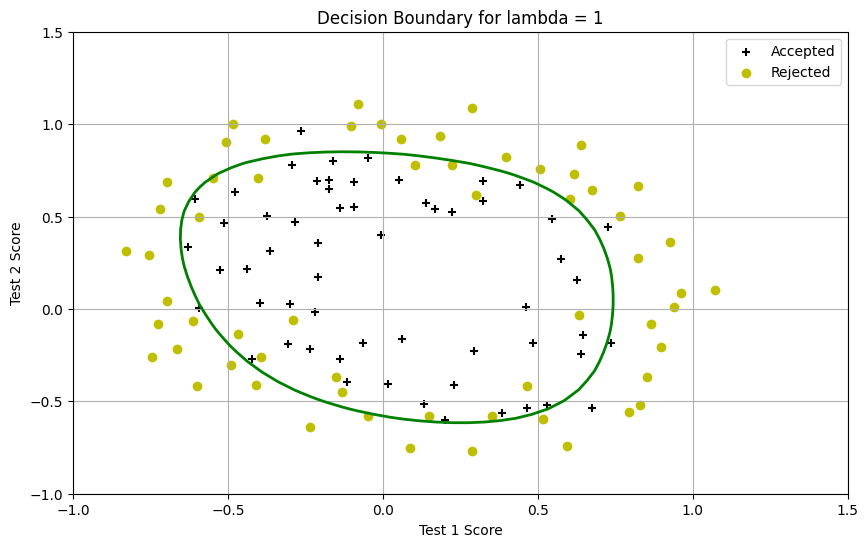

Accuracy for lambda = 1: 83.05%


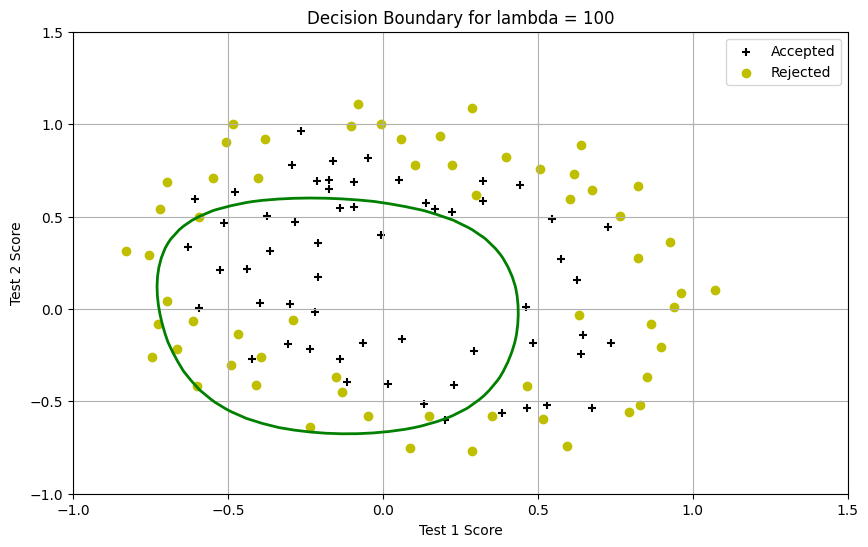

Accuracy for lambda = 100: 61.02%

Best accuracy is 88.14% with lambda = 0


In [ ]:
lambda_values = [0, 1, 100]
accuracies = []

for lambda_ in lambda_values:
    optimal_theta = findOptimalCoefficients(X_poly, y, lambda_)
    plotDecisionBoundary(optimal_theta, X_poly, y, lambda_)
    predictions = predict(optimal_theta, X_poly)
    accuracy = accuracy_score(y, predictions)
    accuracies.append(accuracy)
    print(f"Accuracy for lambda = {lambda_}: {accuracy * 100:.2f}%")

best_accuracy_index = np.argmax(accuracies)
best_accuracy = accuracies[best_accuracy_index]
best_lambda = lambda_values[best_accuracy_index]

print(f"\nBest accuracy is {best_accuracy * 100:.2f}% with lambda = {best_lambda}")


**Best accuracy is 88.14% with lambda = 0**